In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import LineString
from config.settings import *

def get_coords_polynomial(*args):
    z = np.polyfit(args[0], args[-1], 3)
    f = np.poly1d(z)
    x = np.linspace(args[0].min(), args[0].max())
    y = f(x)
    return x, y

def get_intersect(*args):
    a = LineString(args[0])
    b = LineString(args[-1])
    coord = a.intersection(b)
    return coord

In [26]:
def get_idrc(idrc):
    csv = [i for i in os.listdir('\\'.join([MATRIX_DIR, idrc])) if 'rc' in i and 'csv' in i]
    csv = os.path.join(MATRIX_DIR, idrc, csv[0])
    df = pd.read_csv(csv)
    fig = csv.split('.')[0] + '.png'
    plt.figure(figsize=(10, 10))
    
    plt.style.use('ggplot')

    x_a, y_a = get_coords_polynomial(df['mx_di'], df['mx_co'])
    x_b, y_b = get_coords_polynomial(df['mx_di'], df['mx_si'])

    line_a = zip(x_a, y_a)
    line_b = zip(x_b, y_b)

    try:
        coord = get_intersect(line_a, line_b)
    except:
        coord = None

    if 'MULTIPOINT' in coord.__str__():
        m = [i for i in coord]
        m.sort(key=lambda p: p.x)
        coord = m[0]

    plt.subplot(2, 2, 1)
#     plt.title('%s' % csv.split('.')[0])
        
    try:
        plt.text(coord.x, coord.y, 'lo: %s' % round(coord.x, 4))
    except:
        pass

    plt.xlabel('Distancia')
    a = plt.scatter(df['mx_di'], df['mx_co'])
    b = plt.scatter(df['mx_di'], df['mx_si'])

    plt.plot(x_a, y_a)
    plt.plot(x_b, y_b)

    plt.legend([a, b], ['corr', 'sign'], fontsize=8)

    x_c, y_c = get_coords_polynomial(df['mx_gr'], df['mx_co'])
    x_d, y_d = get_coords_polynomial(df['mx_gr'], df['mx_si'])

    line_c = zip(x_c, y_c)
    line_d = zip(x_d, y_d)

    try:
        coord = get_intersect(line_c, line_d)
    except:
        coord = None

    if 'MULTIPOINT' in coord.__str__():
        m = [i for i in coord]
        m.sort(key=lambda p: p.x)
        coord = m[0]

    plt.subplot(2, 2, 2)
    plt.xlabel('Gradiente')
    try:
        plt.text(coord.x, coord.y, 'lo: %s' % round(coord.x, 4))
    except:
        pass
    plt.legend([a, b], ['corr', 'sign'], fontsize=8)
    plt.scatter(df['mx_gr'], df['mx_co'])
    plt.scatter(df['mx_gr'], df['mx_si'])

    plt.plot(x_c, y_c)
    plt.plot(x_d, y_d)
    
    plt.suptitle(idrc)

    plt.savefig(fig)
    plt.show()
    return round(coord.x, 4)

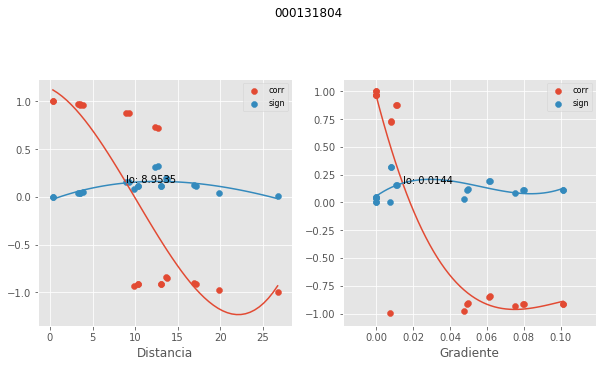

0.0144

In [27]:
idrc = '000131804'
get_idrc(idrc)